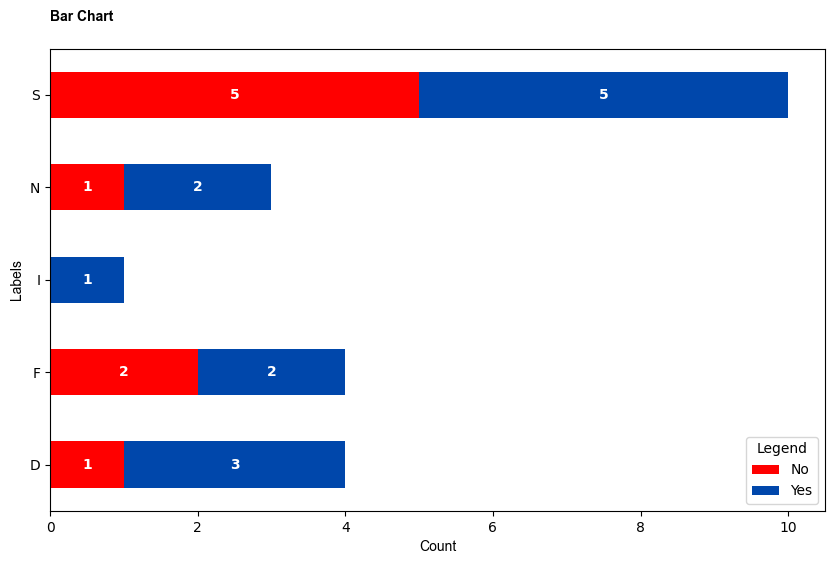

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
bar_df = pd.read_csv("bar_assignment.csv")

# Convert data into long format
bar_counts = bar_df.melt(id_vars=[bar_df.columns[0]], var_name="Variable", value_name="Value")  

# Count Yes (1) and No (0) occurrences
bar_counts = bar_counts.groupby([bar_df.columns[0], "Value"]).size().unstack(fill_value=0)

# Rename columns for clarity
bar_counts = bar_counts.rename(columns={0: 'No', 1: 'Yes'})[['No', 'Yes']]

# Create figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot stacked horizontal bar chart
bars = bar_counts.plot(kind='barh', stacked=True, ax=ax, color=['#FF0000', '#0047AB'])

# Add labels inside bars (white text)
for container in bars.containers:
    labels = [int(v) if v > 0 else '' for v in container.datavalues]
    bars.bar_label(container, labels=labels, label_type='center', color='white', fontsize=10, fontweight='bold')

# Formatting
ax.set_title('Bar Chart', loc='left', fontsize=10, fontweight='bold', pad=20, fontname='Arial')
ax.set_xlabel('Count', fontsize=10, fontname='Arial')
ax.set_ylabel('Labels', fontsize=10, fontname='Arial')
ax.legend(title='Legend', labels=['No', 'Yes'])

plt.show()